In [ ]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
# Read the data

df = pd.read_csv('diabetes.csv')

* Pregnancies	: the Number of pregnancies
* Glucose	: the Glucose level in blood
* BloodPressure	: the Blood pressure measurement
* SkinThickness	: the thickness of the skin
* Insulin	: the Insulin level in blood
* BMI	: the Body mass index
* DiabetesPedigreeFunction	: the Diabetes percentage
* Age	: the age
* Outcome	: the final result 1 is Yes and 0 is No


In [ ]:
# Print the first 5 rows of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Get the shape of the data
df.shape

(768, 9)

In [ ]:
# Check the data types of the variables
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Check missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Get the most important features
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


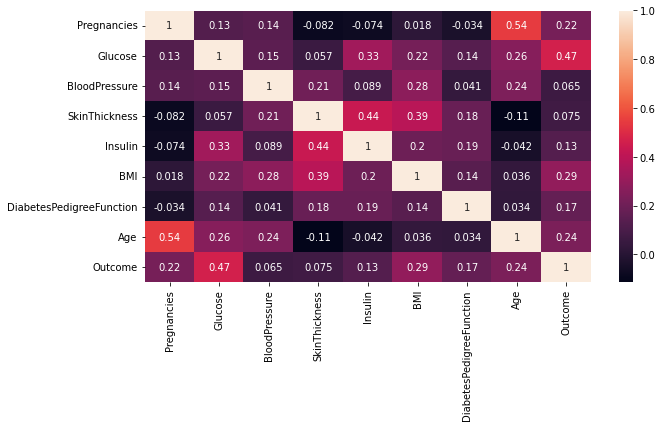

In [ ]:
# Plot the correlation matrix
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Only get the most correlated features
target = df[['Outcome']]

# Ambil 5 fitur yang paling berpengaruh terhadap Outcome
df = df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'Insulin']]

labels = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'Insulin']

In [ ]:
from sklearn.preprocessing import StandardScaler
df_std = df.copy()

for i in df.columns:
  scale = StandardScaler().fit(df[[i]])
  df_std[i] = scale.transform(df[[i]])

In [ ]:
# Show the first 5 rows of the data
df_std.head()

,Glucose,BMI,Age,Pregnancies,Insulin
0,0.848324,0.204013,1.425995,0.639947,-0.692891
1,-1.123396,-0.684422,-0.190672,-0.844885,-0.692891
2,1.943724,-1.103255,-0.105584,1.233880,-0.692891
3,-0.998208,-0.494043,-1.041549,-0.844885,0.123302
4,0.504055,1.409746,-0.020496,-1.141852,0.765836


In [ ]:
plotDF = pd.concat([df, target],axis=1)

In [ ]:
plotDF

,Glucose,BMI,Age,Pregnancies,Insulin,Outcome
0,148,33.6,50,6,0,1
1,85,26.6,31,1,0,0
2,183,23.3,32,8,0,1
3,89,28.1,21,1,94,0
4,137,43.1,33,0,168,1
...,...,...,...,...,...,...
763,101,32.9,63,10,180,0
764,122,36.8,27,2,0,0
765,121,26.2,30,5,112,0
766,126,30.1,47,1,0,1


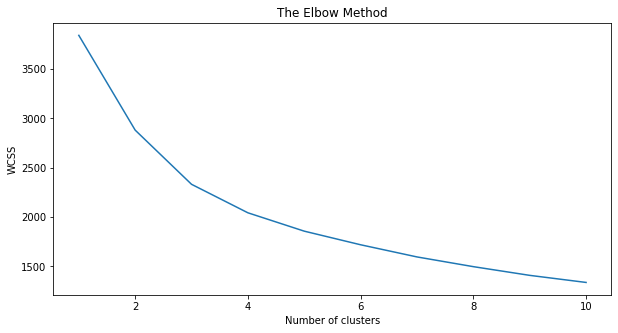

In [ ]:
# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K antara 3 atau 4. Untuk memastikan, digunakan silhoutte_score

In [ ]:
from sklearn.metrics.cluster import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
# Fitting input data
kmeans = kmeans.fit(df_std)
# Mendapatkan cluster labels
labels = kmeans.predict(df_std)
print("Silhoutte score: ",silhouette_score(df_std, labels))

Silhoutte score:  0.213279702738994


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
# Fitting input data
kmeans = kmeans.fit(df_std)
# Mendapatkan cluster labels
labels = kmeans.predict(df_std)
print("Silhoutte score: ",silhouette_score(df_std, labels))

Silhoutte score:  0.26669154285870406


Dipilih k = 3.

In [ ]:
# Fit the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(df_std)

In [ ]:
plotDF['Predict'] = y_kmeans

#EDA

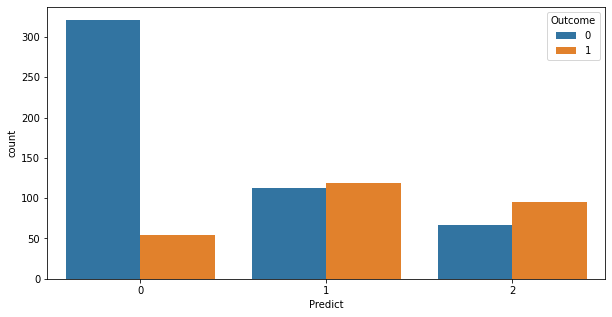

In [ ]:
sns.countplot(x = plotDF['Predict'], hue = plotDF['Outcome'])

* Predict 0 = Sangat dominan outcome 0, tidak diabetes
* Predict 1 = Cenderung imbang outcome 0-1, berpotensi sedang
* Predict 2 = Dominan outcome 1, berpotensi tinggi diabetes

Untuk eksplorasi selanjutnya, data yang digunakan adalah data asli sebelum normalisasi. Data dikelompokkan berdasarkan cluster hasil prediksi model

In [ ]:
P0 = plotDF[plotDF['Predict']==0]
P1 = plotDF[plotDF['Predict']==1]
P2 = plotDF[plotDF['Predict']==2]

In [ ]:
P0.describe()

,Glucose,BMI,Age,Pregnancies,Insulin,Outcome,Predict
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.0
mean,102.800000,29.196533,26.221333,2.216000,44.834667,0.144000,0.0
std,22.192642,7.399759,5.386810,1.872617,55.564958,0.351559,0.0
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.0
25%,90.000000,25.100000,22.000000,1.000000,0.000000,0.000000,0.0
50%,102.000000,29.300000,25.000000,2.000000,0.000000,0.000000,0.0
75%,116.000000,33.800000,28.000000,3.000000,82.000000,0.000000,0.0
max,175.000000,46.300000,47.000000,10.000000,278.000000,1.000000,0.0


In [ ]:
P1.describe()

,Glucose,BMI,Age,Pregnancies,Insulin,Outcome,Predict
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0
mean,130.484848,32.440693,46.662338,7.497835,43.874459,0.515152,1.0
std,30.887291,6.853802,10.039414,3.057243,76.852240,0.500856,0.0
min,57.000000,0.000000,29.000000,0.000000,0.000000,0.000000,1.0
25%,107.500000,27.850000,39.000000,5.000000,0.000000,0.000000,1.0
50%,129.000000,32.800000,45.000000,7.000000,0.000000,1.000000,1.0
75%,152.000000,36.600000,53.000000,9.000000,77.000000,1.000000,1.0
max,197.000000,52.300000,81.000000,17.000000,326.000000,1.000000,1.0


In [ ]:
P2.describe()

,Glucose,BMI,Age,Pregnancies,Insulin,Outcome,Predict
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.0
mean,149.104938,37.825926,30.351852,2.407407,211.962963,0.586420,2.0
std,25.838632,7.006222,8.115220,2.277504,159.331791,0.494002,0.0
min,88.000000,23.400000,21.000000,0.000000,0.000000,0.000000,2.0
25%,127.250000,33.125000,25.000000,1.000000,130.000000,0.000000,2.0
50%,147.000000,36.600000,28.000000,2.000000,183.500000,1.000000,2.0
75%,171.750000,42.400000,33.750000,4.000000,276.500000,1.000000,2.0
max,199.000000,67.100000,60.000000,9.000000,846.000000,1.000000,2.0


## Glucose

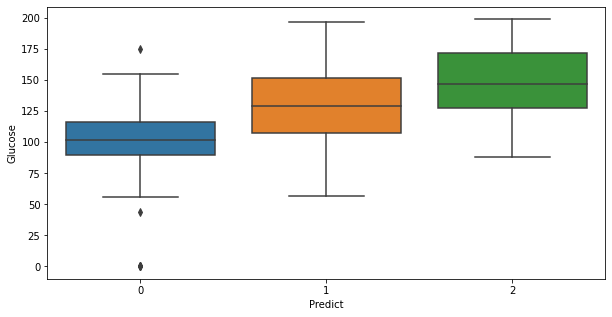

In [ ]:
sns.boxplot(x = plotDF['Predict'], y =plotDF['Glucose'])

Pola persebaran terlihat jelas. Tingkat glucose tiap cluster terlihat perbedaan persebarannya. Makin tinggi glucose, makin tinggi prediksi terkena diabetes. **Fitur Glucose akan digunakan dalam plot akhir.**

## BMI

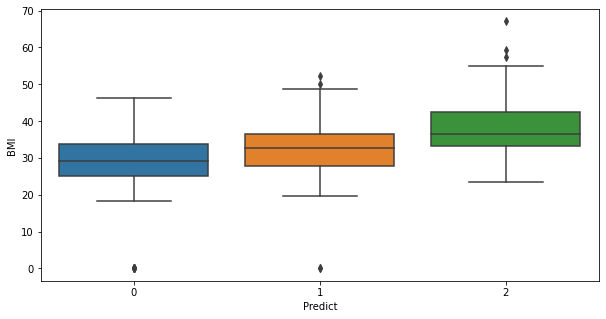

In [ ]:
sns.boxplot(x = plotDF['Predict'], y =plotDF['BMI'])

Pola persebaran terlihat cukup jelas. Namun, tingkat BMI untuk setiap cluster perbedaan persebaran dan rentang nilainya cukup minim. Secara umum, makin tinggi BMI, makin tinggi prediksi terkena diabetes. **Fitur BMI tidak akan digunakan dalam plot akhir.**

## Age

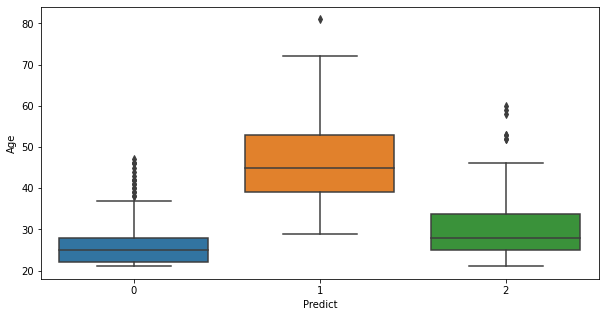

In [ ]:
sns.boxplot(x = plotDF['Predict'], y =plotDF['Age'])

Pola persebaran terlihat cukup jelas. Tingkat Age untuk tiap cluster terlihat perbedaan persebaran dan rentang nilainya. **Fitur Age akan digunakan dalam plot.**

## Pregnancies

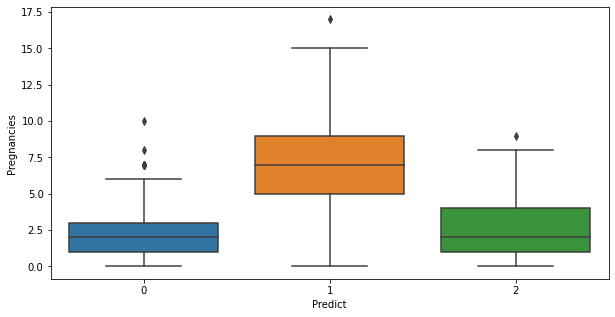

In [ ]:
sns.boxplot(x = plotDF['Predict'], y =plotDF['Pregnancies'])

Pola persebaran terlihat cukup jelas. Tingkat Pregnancies untuk tiap cluster terlihat perbedaan persebaran dan rentang nilainya. **Fitur Pregnancies akan digunakan dalam plot.**

## Insulin

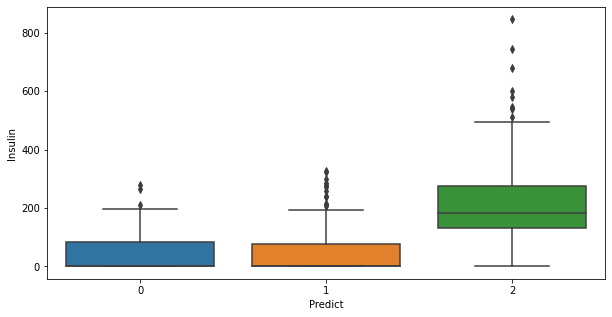

In [ ]:
sns.boxplot(x = plotDF['Predict'], y =plotDF['Insulin'])

Pola persebaran kurang jelas. Tingkat glucose antara cluster 0 dan 1 tidak terlihat perbedaan persebarannya, meskipun cluster 2 terlihat perbedaannya. **Fitur Insulin tidak akan digunakan dalam plot akhir.**

# Plotting

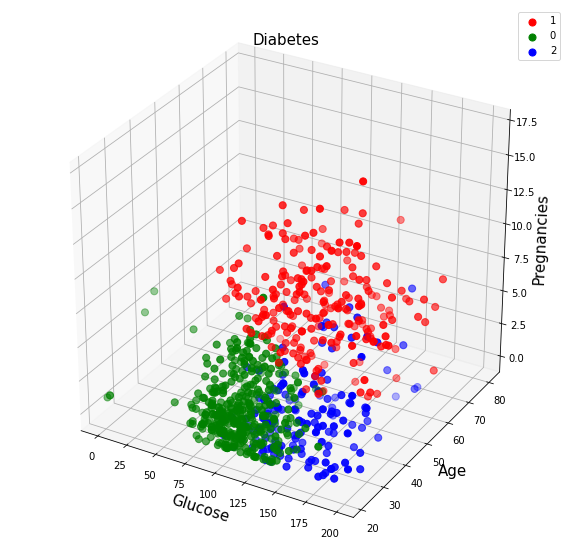

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')

ax.set_xlabel('Glucose', fontsize = 15)
ax.set_ylabel('Age', fontsize = 15)
ax.set_zlabel('Pregnancies', fontsize = 15)
ax.set_title('Diabetes', fontsize = 15)
targets = plotDF['Predict'].unique()
colors = ['r','g','b','y']

for target, color in zip(targets, colors):
  ax.scatter(df[plotDF['Predict']==target]['Glucose'],
             df[plotDF['Predict']==target]['Age'],
             df[plotDF['Predict']==target]['Pregnancies'],
             c = color, s = 50)
  ax.legend(targets)
  ax.grid()

In [ ]:
# Serializing the model
import pickle
pickle.dump(kmeans, open('model.pkl', 'wb'))